In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torchvision
import captum
import captum.optim as optimviz

In [3]:
# get alexnet
from alexnet import model as alexnet

print(alexnet)

Using cache found in /home/kevin/.cache/torch/hub/pytorch_vision_v0.9.0


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [4]:
# Run BigGAN

import torch
from pytorch_pretrained_biggan import (BigGAN, one_hot_from_names, truncated_noise_sample,
                                       convert_to_images)

# OPTIONAL: if you want to have more information on what's happening, activate the logger as follows
import logging
logging.basicConfig(level=logging.ERROR)

# Load pre-trained model tokenizer (vocabulary)
model = BigGAN.from_pretrained('biggan-deep-256').to("cuda")

In [6]:
import captum
import captum.optim as optimviz

In [7]:
# Normal image optimization with captum appears to work
target = alexnet.features[8]
channel = 0

image = optimviz.images.NaturalImage((224, 224)).to("cuda")
loss_fn = optimviz.loss.ChannelActivation(target, channel)
transforms = torch.nn.Sequential(
    torch.nn.ReflectionPad2d(4),
    optimviz.transforms.RandomSpatialJitter(8),
    optimviz.transforms.RandomScale(scale=(1, 0.975, 1.025, 0.95, 1.05)),
    torchvision.transforms.RandomRotation(degrees=(-5, 5)),
    optimviz.transforms.RandomSpatialJitter(2),
)
obj = optimviz.InputOptimization(
    alexnet, input_param=image, loss_function=loss_fn)
history = obj.optimize(optimviz.optimization.n_steps(128, True))

  0%|          | 0/128 [00:00<?, ? step/s]

/home/kevin/.local/share/virtualenvs/231nFinalProject-K6JlCK0i/lib/python3.8/site-packages/torch/tensor.py:758: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:934.)
  return super(Tensor, self).refine_names(names)


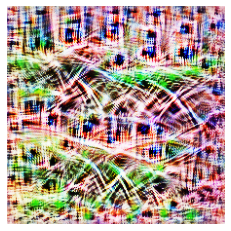

In [8]:
image().show()

torch.Size([1, 256])


  0%|          | 0/128 [00:00<?, ? step/s]

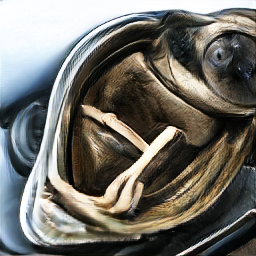

In [50]:
from prior_optimization import create_optimized_image, display_optimized_image

biggan_input = create_optimized_image(alexnet.features[8], 100, n_steps=128)
display_optimized_image(biggan_input)